In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"yield_df.csv")
df.head(3)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [5]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(2310)

In [7]:
#remove duplicate
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


## Transform average_rain_fall_mm_per_year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [11]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [12]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [13]:
df=df.drop(to_drop)

In [14]:
df.head(3)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37


## Visualization 

### Graph Frequency vs Area

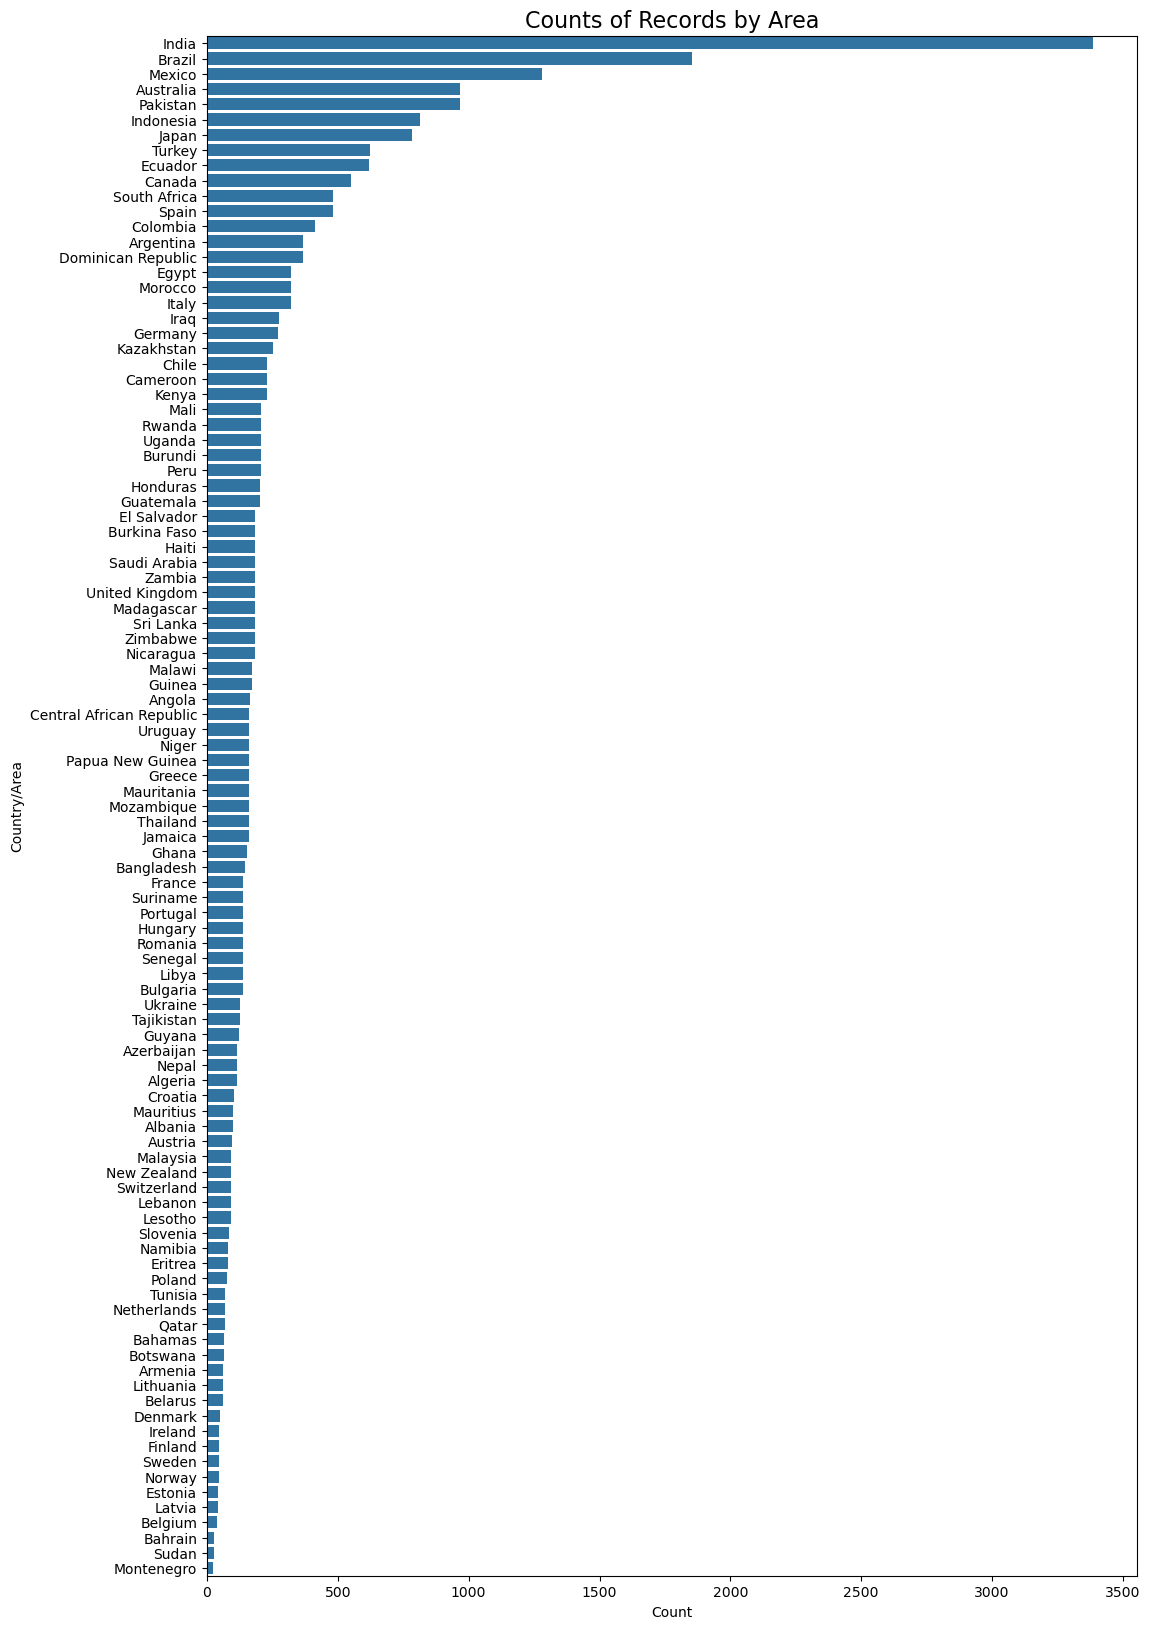

In [15]:
plt.figure(figsize=(12,20))
# sns.countplot(y=df['Area'])
sns.countplot(y=df['Area'], order=df['Area'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Country/Area")
plt.title("Counts of Records by Area", fontsize=16)
plt.show()

### Yield_per_country

In [16]:
country=(df['Area'].unique())

In [17]:
for state in country:
    print(state)

Albania
Algeria
Angola
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cameroon
Canada
Central African Republic
Chile
Colombia
Croatia
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Finland
France
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Honduras
Hungary
India
Indonesia
Iraq
Ireland
Italy
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Lesotho
Libya
Lithuania
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Norway
Pakistan
Papua New Guinea
Peru
Poland
Portugal
Qatar
Romania
Rwanda
Saudi Arabia
Senegal
Slovenia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Tajikistan
Thailand
Tunisia
Turkey
Uganda
Ukraine
United Kingdom
Uruguay
Zambia
Zimbabwe


In [18]:
yield_per_country=[]
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17292\3132259361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country, x=yield_per_country, palette="viridis")


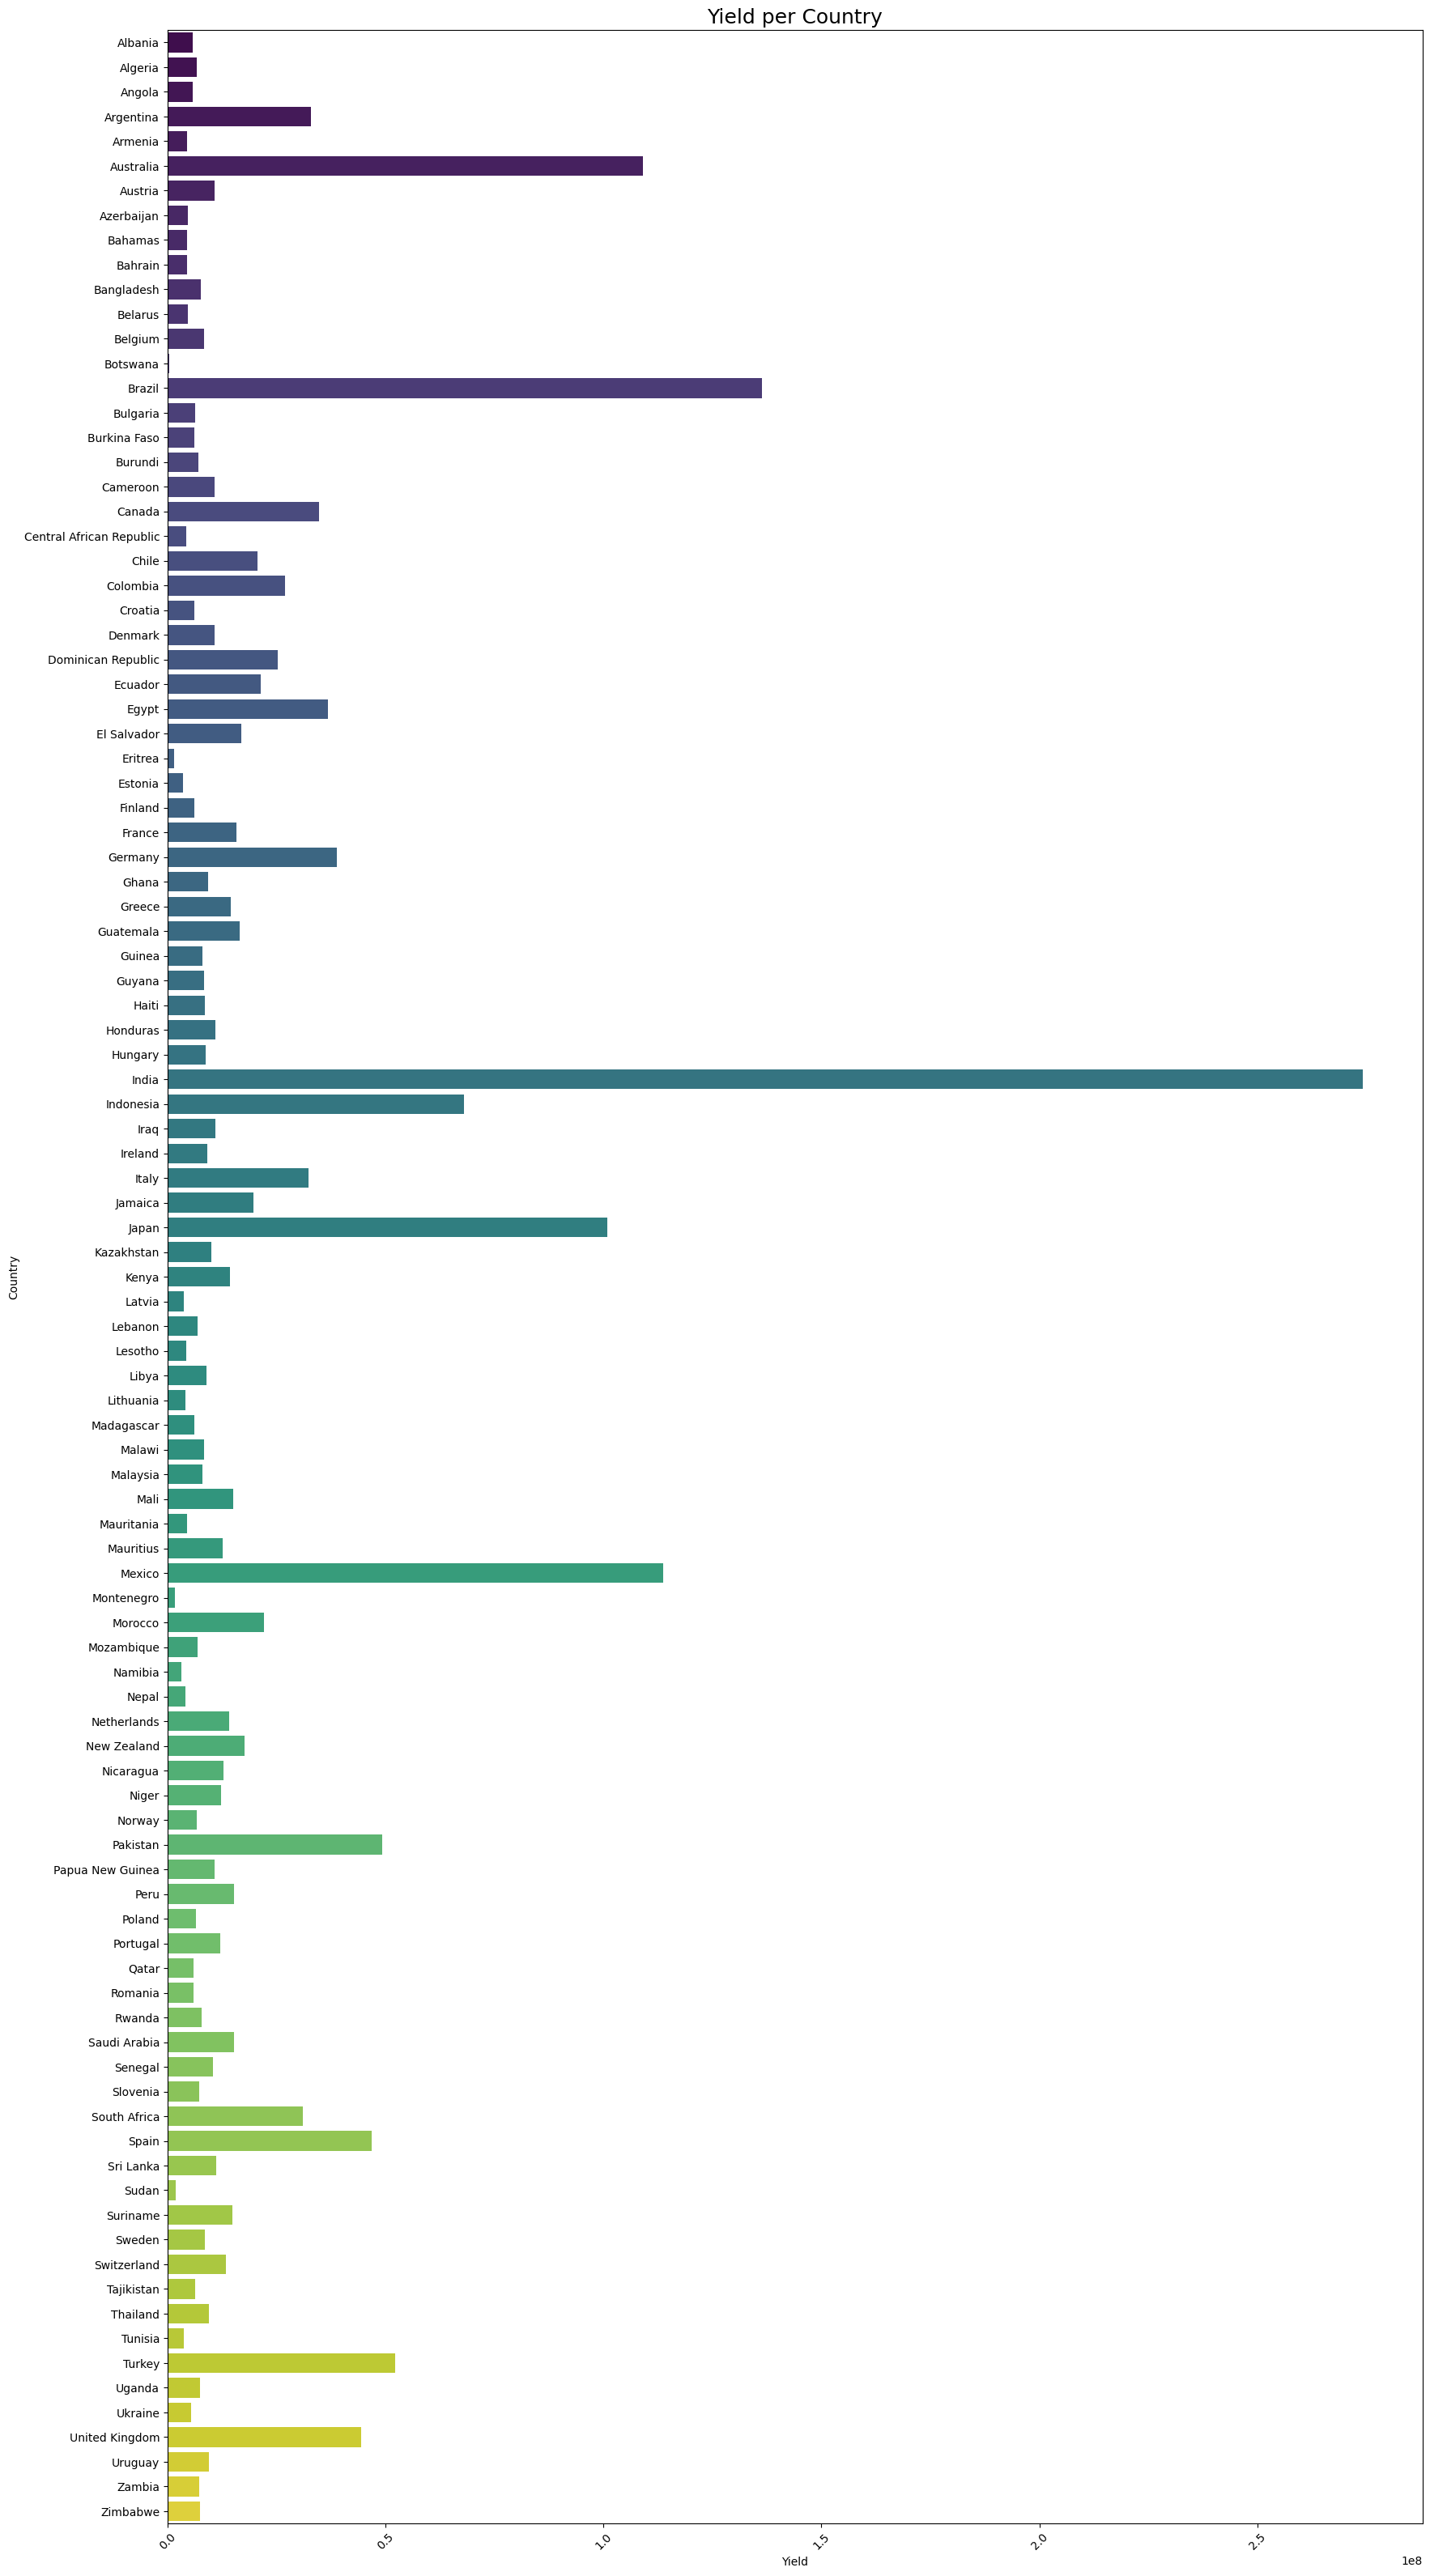

In [19]:
plt.figure(figsize=(20,40))

sns.barplot(y=country, x=yield_per_country, palette="viridis")
plt.xlabel("Yield")
plt.ylabel("Country")
plt.title("Yield per Country", fontsize=18)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='count', ylabel='Item'>

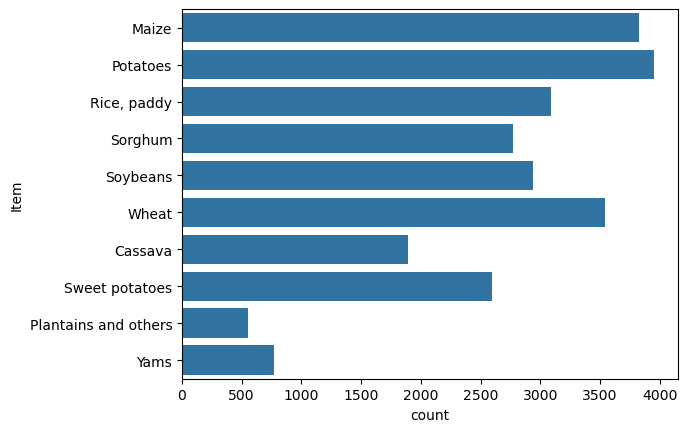

In [20]:
sns.countplot(y=df['Item'])

# Train Test split

In [21]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [22]:
col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Item','Area','hg/ha_yield']
df=df[col]

In [23]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item,Area,hg/ha_yield
0,1990,1485.0,121.00,16.37,Maize,Albania,36613
1,1990,1485.0,121.00,16.37,Potatoes,Albania,66667
2,1990,1485.0,121.00,16.37,"Rice, paddy",Albania,23333
3,1990,1485.0,121.00,16.37,Sorghum,Albania,12500
4,1990,1485.0,121.00,16.37,Soybeans,Albania,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,"Rice, paddy",Zimbabwe,22581
28238,2013,657.0,2550.07,19.76,Sorghum,Zimbabwe,3066
28239,2013,657.0,2550.07,19.76,Soybeans,Zimbabwe,13142
28240,2013,657.0,2550.07,19.76,Sweet potatoes,Zimbabwe,22222


In [24]:
X=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  

In [27]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item,Area
24234,2000,59.0,3024.11,26.55,Sorghum,Saudi Arabia
9468,2012,652.0,8002.20,18.82,Sweet potatoes,Greece
6793,2006,3240.0,98328.63,27.51,Maize,Colombia
28212,2010,657.0,3305.17,21.17,Potatoes,Zimbabwe
7358,2007,1410.0,5689.80,27.08,Sweet potatoes,Dominican Republic
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Sweet potatoes,Portugal
5960,2006,537.0,36572.75,7.85,Wheat,Canada
860,1991,534.0,17866.00,18.73,Potatoes,Australia
17223,1998,250.0,6416.14,6.94,Potatoes,Kazakhstan


 ##  Converting Categoricsl to Numerical and Scaling The Value

In [28]:
from  sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [29]:
ohe=OneHotEncoder(drop='first')
sclar=StandardScaler()

### Using column Transformer

In [31]:
preprocessor=ColumnTransformer(
    transformers=[
        ('onehotencoder',ohe,[4,5]),
        ('sc',sclar,[0,1,2,3])
        
    ],
    remainder='passthrough'
)

In [32]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('sc', StandardScaler(), [0, 1, 2, 3])])

In [33]:
X_train_dummy=preprocessor.fit_transform(X_train)
X_test_dummy=preprocessor.fit_transform(X_test)

In [34]:
X_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

## TReaining Model

In [39]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [40]:
models={
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'Knr':KNeighborsClassifier(),
    'dtr':DecisionTreeRegressor()
}
for name,mod in models.items():
    mod.fit(X_train_dummy,y_train)
    y_pred=mod.predict(X_test_dummy)

    print(f"{name} MAE : {mean_absolute_error(y_test,y_pred)} Score {r2_score(y_test,y_pred)}")


lr MAE : 29907.66628489224 Score 0.7486483887352833
lss MAE : 29893.167248301586 Score 0.7485658031758544
rg MAE : 29861.35975927107 Score 0.7485295210957817
Knr MAE : 7570.81299402352 Score 0.9538625648420597
dtr MAE : 8079.801812222865 Score 0.935756700013725


## SElect  Model

In [42]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 22411.,  15838.,  72614., ...,  52692.,   9621., 279000.])

## Predictive System

In [47]:
def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item,Area):
 features= np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item,Area]])

 transformed_features=preprocessor.transform(features)

 predicted_value=dtr.predict(transformed_features).reshape(1,-1)
 return  predicted_value[0]


In [48]:
Year=2000	
average_rain_fall_mm_per_year=59.0	
pesticides_tonnes=3024.11
avg_temp=26.55
Item='Sorghum'
Area='Saudi Arabia'

result=prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item,Area)


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
result

array([13192.])

# Pickle Files

In [51]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [52]:
import sklearn
print(sklearn.__version__)

1.6.1


In [53]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item,Area,hg/ha_yield
0,1990,1485.0,121.00,16.37,Maize,Albania,36613
1,1990,1485.0,121.00,16.37,Potatoes,Albania,66667
2,1990,1485.0,121.00,16.37,"Rice, paddy",Albania,23333
3,1990,1485.0,121.00,16.37,Sorghum,Albania,12500
4,1990,1485.0,121.00,16.37,Soybeans,Albania,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,"Rice, paddy",Zimbabwe,22581
28238,2013,657.0,2550.07,19.76,Sorghum,Zimbabwe,3066
28239,2013,657.0,2550.07,19.76,Soybeans,Zimbabwe,13142
28240,2013,657.0,2550.07,19.76,Sweet potatoes,Zimbabwe,22222
